# Project: Investigate a Dataset - [TMDb movie data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
<ul>
<li>Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe ( | ) characters.</li>
<li>There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.</li>
<li>The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.</li>
</ul>

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling
### General Properties

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
# types and look for instances of missing or possibly errant data.
df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [4]:
#Display the shape of dataframe
df.shape

(10866, 21)

In [5]:
#Display some info about dataframe
#We can see that there is 21 columns and there are some columns with missing values.
#('imdb_id','cast','homepage','director','tagline','keywords','overview','genres','production_companies')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [6]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


## Data Cleaning

#### Drop Extraneous Columns


In [7]:
#We need to remove columns that we may not use in our questions 
#('id','imdb_id','homepage','tagline','keywords','overview','budget_adj','revenue_adj')
df.drop(columns=['id','imdb_id','homepage','tagline','keywords','overview','production_companies','budget_adj','revenue_adj'], axis=1, inplace=True)

In [8]:
#Check the shape of dataframe after removing columns.
df.shape

(10866, 12)

#### Drop NAN Values

In [9]:
#We check the sum of NAN values in each column in dataframe.
df.isna().sum()

popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
dtype: int64

In [10]:
#Sum of all NAN values in dataframe.
df.isna().sum().sum()

143

In [11]:
#We remove rows that contain NAN values.
df.dropna(axis=0, inplace=True)

After removing it should gives us 0.

In [12]:
#Sum of all NAN values in dataframe.
df.isna().sum().sum()

0

In [13]:
#Confirm changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10732 entries, 0 to 10865
Data columns (total 12 columns):
popularity        10732 non-null float64
budget            10732 non-null int64
revenue           10732 non-null int64
original_title    10732 non-null object
cast              10732 non-null object
director          10732 non-null object
runtime           10732 non-null int64
genres            10732 non-null object
release_date      10732 non-null object
vote_count        10732 non-null int64
vote_average      10732 non-null float64
release_year      10732 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 1.1+ MB


#### Remove Duplicates

In [14]:
#We check the sum of duplicate rows.
df.duplicated().sum()

1

In [15]:
#We remove it by drop_duplicate. After removing it should gives us 0.
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [16]:
#Check the shape of dataframe after cleaning.
df.shape

(10731, 12)

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (Which genres are most popular from year to year?)

In the first question, I think we have a problem in 'genres' column. we have many genres in a single row separated by ' | ' symbol. 

In [17]:
#Display the first 5 rows of dataframe.
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015


#### Fixing 'genres' column with ' | ' symbol.

In [18]:
#Create a mini dataframe of genres column.
df_gen = df['genres'].str.get_dummies(sep='|')
df_gen

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
3,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1
6,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
7,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
8,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


#### This is a mini dataframe created from "genres" column to separate each genre in genres to a single column and calculate number of instance of each row by making it's value by 1 if exists and 0 if NOT exists.

In [19]:
#Sum of all genre columns.
df_gen.sum()

Action             2376
Adventure          1465
Animation           664
Comedy             3775
Crime              1353
Documentary         470
Drama              4746
Family             1214
Fantasy             908
Foreign             184
History             330
Horror             1636
Music               399
Mystery             808
Romance            1708
Science Fiction    1221
TV Movie            162
Thriller           2902
War                 268
Western             164
dtype: int64

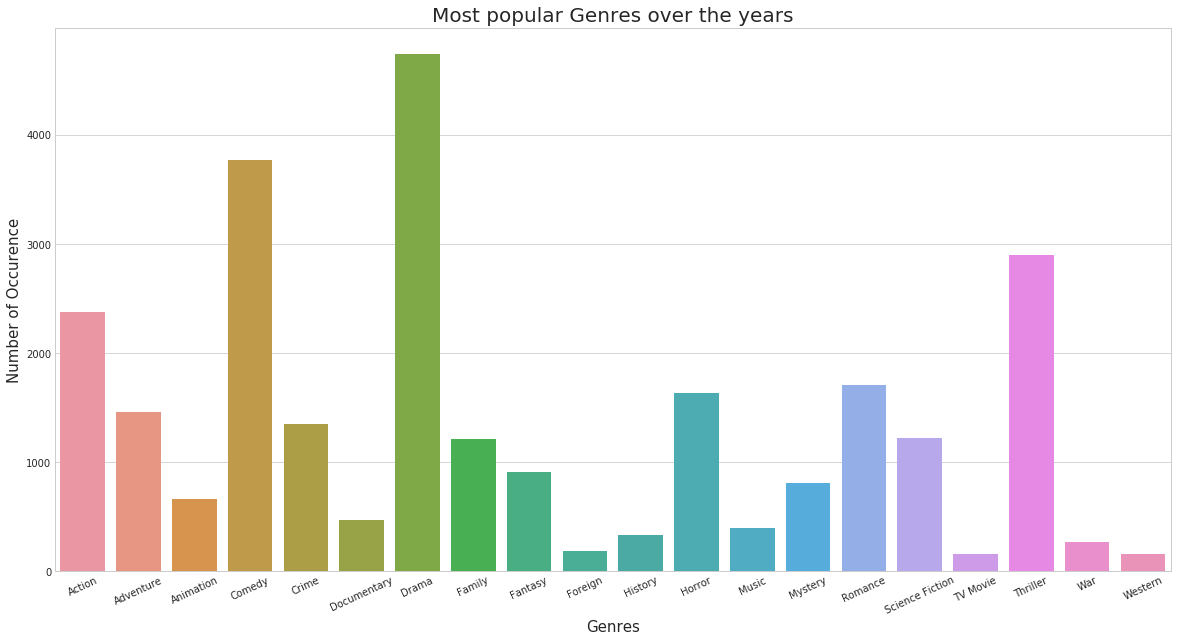

In [20]:
#Visualizing the popular genres over years.
sns.set_style("whitegrid")
plt.figure(figsize=(20,10))
sns.barplot(x=df_gen.columns, y=df_gen.sum())
plt.title("Most popular Genres over the years", fontsize=20)
plt.xlabel("Genres", fontsize=15)
plt.ylabel("Number of Occurence", fontsize=15)
plt.xticks(rotation=25);

#### From the graph above, we can conclude that most popular genres are: Drama, Comedy, Thriller, Action, and Romance.

### Research Question 2  (What kinds of properties are associated with movies that have high revenues?)

In the second question, I think that 'popularity' , 'budget' , 'runtime' , 'vote_count' and 'vote_average' are independent variables related to a single dependent variable 'revenue'.

#### Relation between Revenue and Popularity

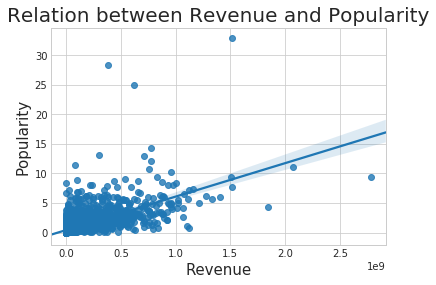

In [21]:
#Create a function to plot the relation between revenue and popularity. 
def plot(df1,df2,modify_tit_ylab):
    sns.set_style("whitegrid")
    sns.regplot(x=df1 , y=df2)
    plt.title("Relation between Revenue and {}".format(modify_tit_ylab), fontsize=20)
    plt.xlabel("Revenue", fontsize=15)
    plt.ylabel("{}".format(modify_tit_ylab), fontsize=15);
    return
plot(df['revenue'],df['popularity'],'Popularity')

#### The relation between Revenue and Popularity is positively correlated. 

#### Relation between Revenue and Budget

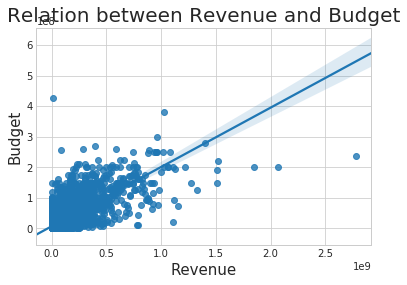

In [22]:
#Call the plot function with new attributes.
#Plot the relation between revenue and budget.
plot(df['revenue'],df['budget'],'Budget')

#### The relation between Revenue and Budget is perfect positively correlated. 

#### Relation between Revenue and Runtime

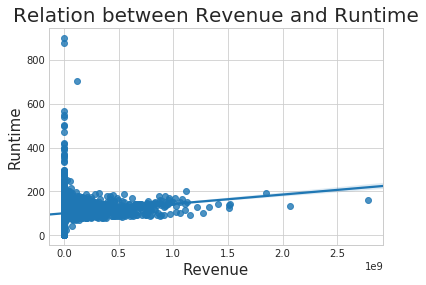

In [23]:
#Call the plot function with new attributes.
#Plot the relation between revenue and runtime.
plot(df['revenue'],df['runtime'],'Runtime')

#### The relation between Revenue and Runtime is slightly positive correlated. 

#### Relation between Revenue and Vote Counts

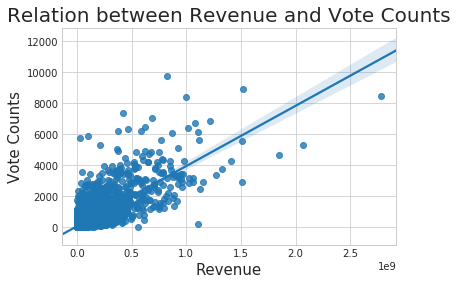

In [24]:
#Call the plot function with new attributes.
#Plot the relation between revenue and vote counts.
plot(df['revenue'],df['vote_count'],'Vote Counts')

#### The relation between Revenue and Vote Counts is perfect positively correlated. 

#### Relation between Revenue and Vote Average

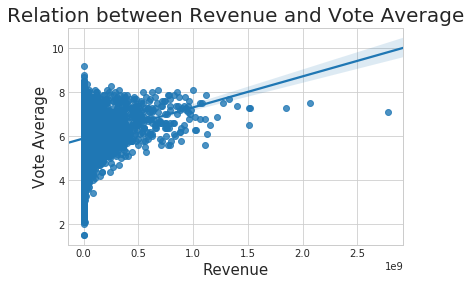

In [25]:
#Call the plot function with new attributes.
#Plot the relation between revenue and vote average.
plot(df['revenue'],df['vote_average'],'Vote Average')

#### The relation between Revenue and Vote Average is positively correlated more than 6 of vote average.

#### Visualizing the whole Dataframe

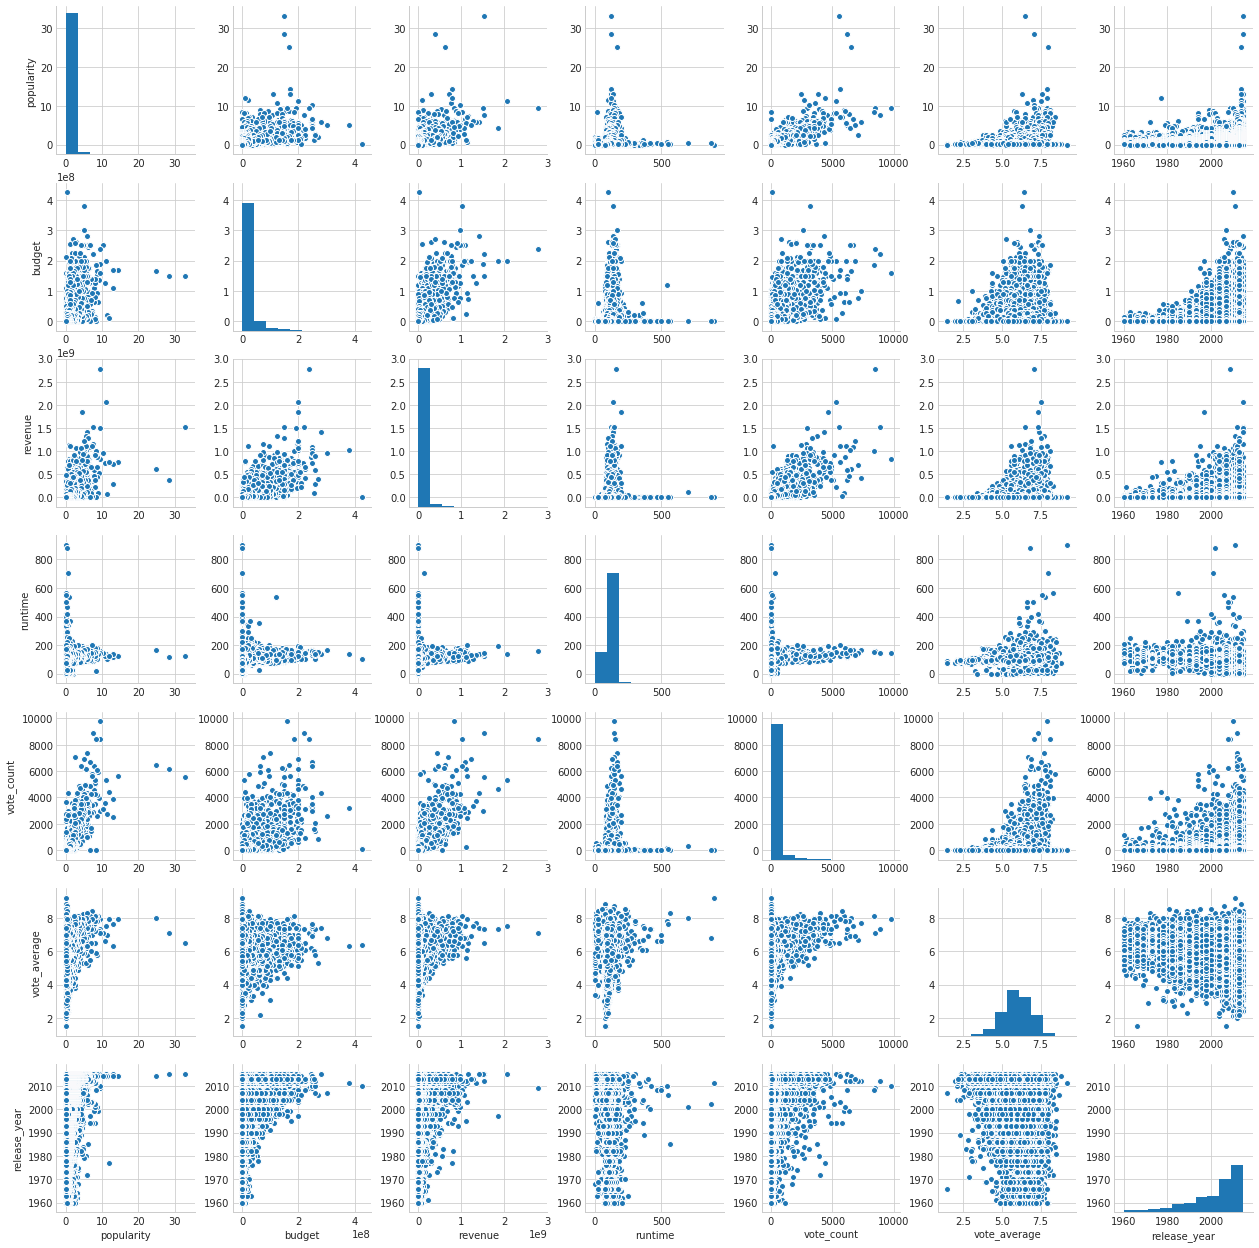

In [26]:
#plot the dataframe.
sns.set_style("whitegrid")
sns.pairplot(df);

#### This plot visualize the relation of each column of the dataset with each other.

<a id='conclusions'></a>
## Conclusions

> <ul>
      <li>In first question, I have found that the most popular genres from 1960 to 2015 are:-
          <ol>
              <li>Drama</li>
              <li>Comedy</li>
              <li>Thriller</li>
              <li>Action</li>
              <li>Romance</li>
          </ol>
      </li>
      <li>In second question, I've decided that popularity, budget, runtime, vote count, and vote average are related to high revenues.
      </li>
      <li>We can conclude movies with higher budgets resulting increase in the revenues.</li>
      <li>We can conclude movies with higher votes resulting increase in the revenues.</li>
      <li>We can conclude movies with vote average above 6 resulting increase in the revenues.</li>
  </ul>
## Limitations
> During the Research Question 1, I splitted the data seperated by ' | ' into mini dataframe by using get_dummies() for easy detecting the genres and the number of occurence for each genre.

## Submitting your Project 


In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])